In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pca import pca

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_2_imputed.csv", index_col=0)
base_df_no_industry = base_df.drop(columns=["industry"])

/tmp/ipykernel_595/674001718.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
model = pca(n_components=6, normalize=True)
results = model.fit_transform(base_df_no_industry)
print(results['explained_var'])
results['loadings']

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[0.48509934 0.68586571 0.81967755 0.94073401 0.98326551 1.        ]


,revenues,ebit,employees,market_cap,outstanding_shares,stock_price
PC1,0.520227,0.557334,-0.314114,0.531627,0.191621,-0.026997
PC2,-0.133457,-0.123625,-0.161453,-0.091718,0.605731,-0.752009
PC3,0.117924,0.064854,0.808427,0.115887,0.523422,0.202319
PC4,-0.245312,-0.104659,-0.462556,-0.094469,0.562212,0.624423
PC5,-0.681812,0.003695,0.057604,0.723618,-0.079057,-0.043910
PC6,0.415454,-0.811740,-0.066590,0.403712,0.008288,0.031449


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


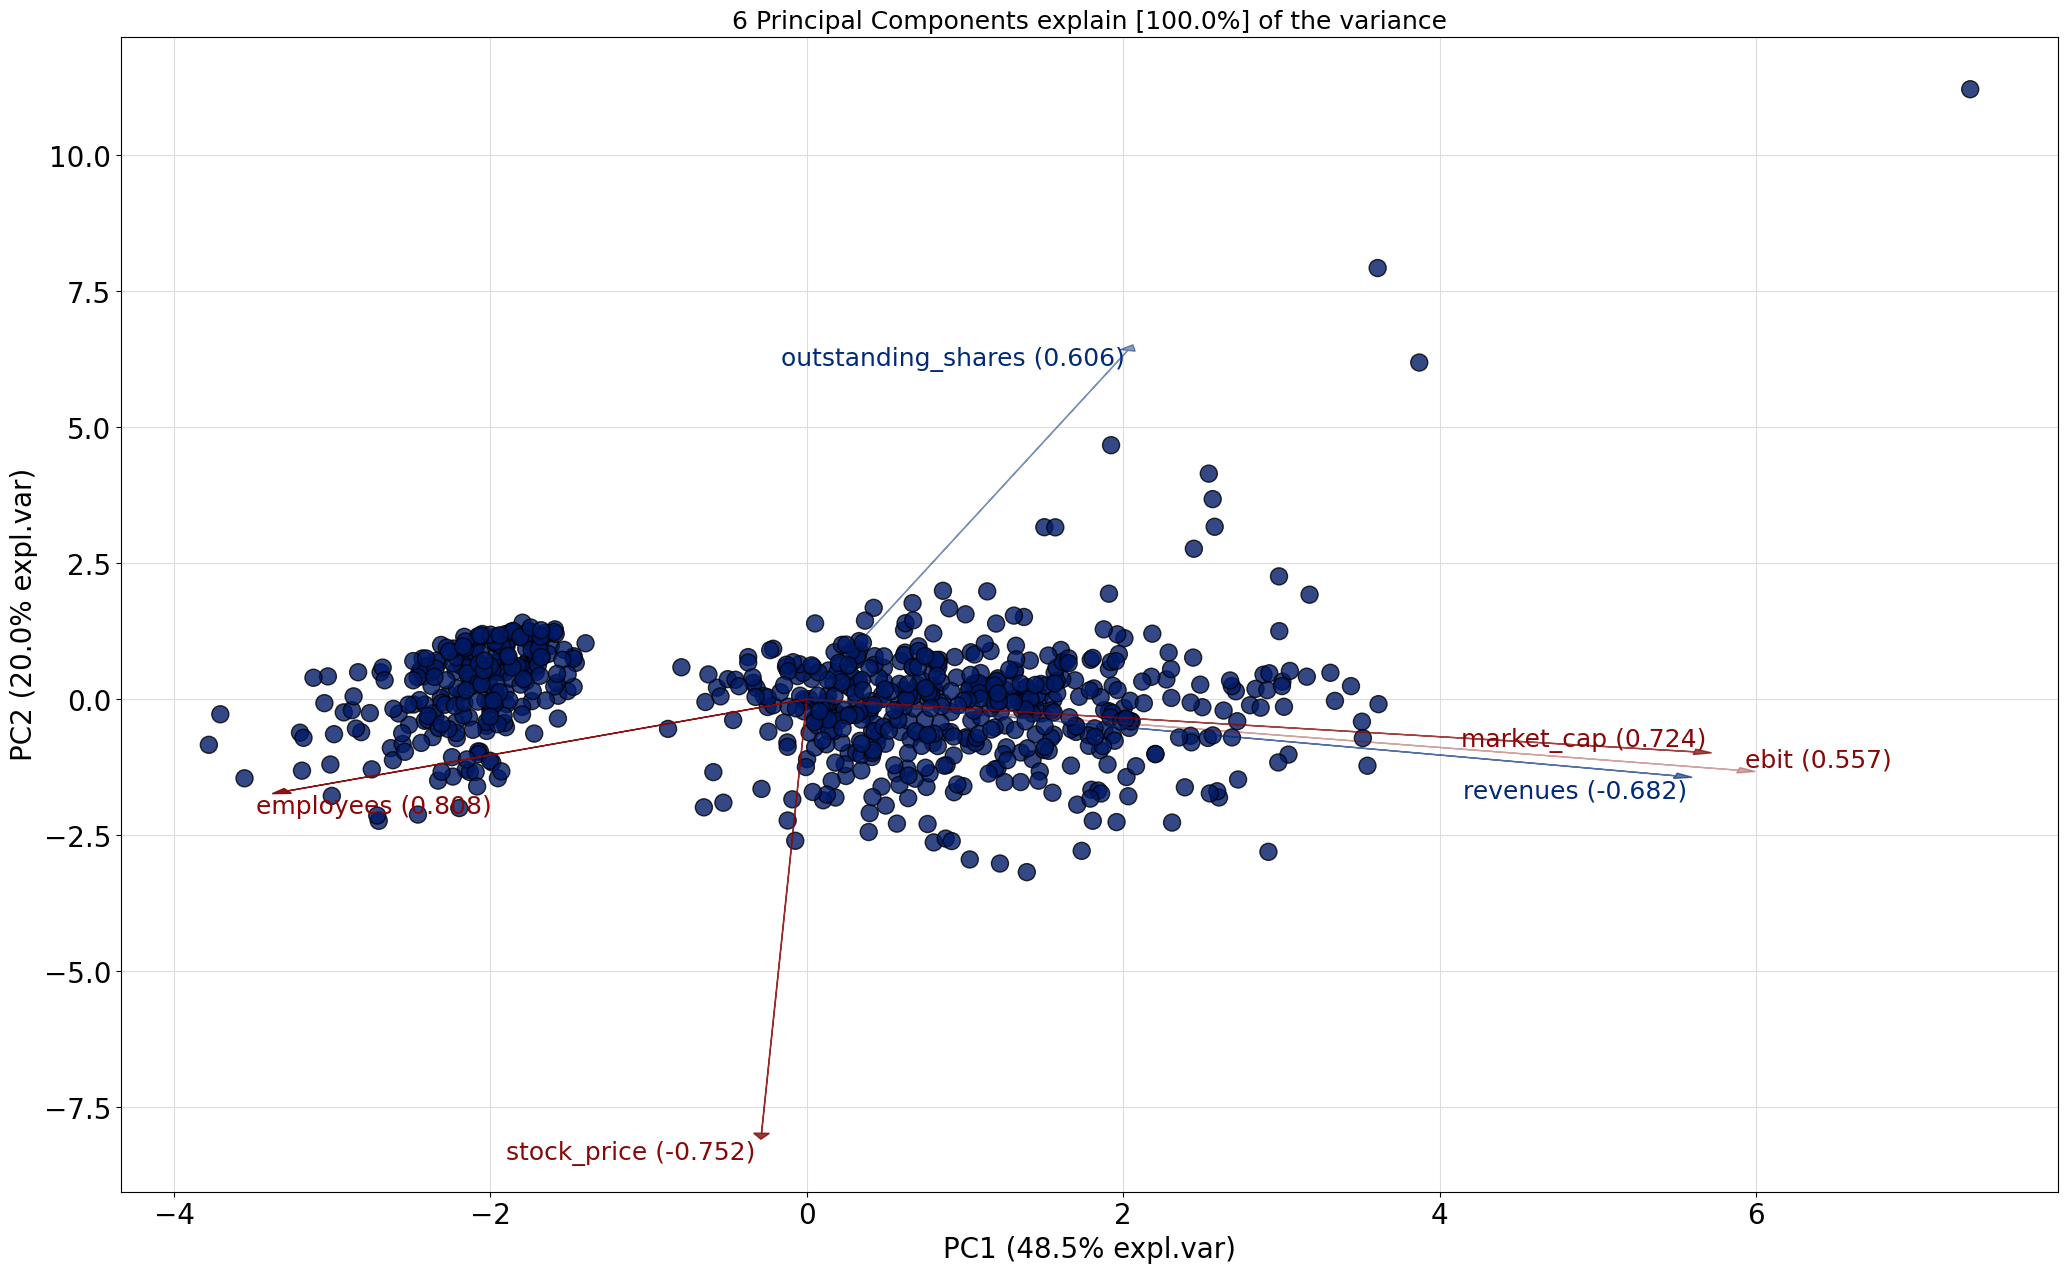

In [3]:
# Visualize the results via a biplot
fig, ax = model.biplot(n_feat=10, legend=False)
plt.show()

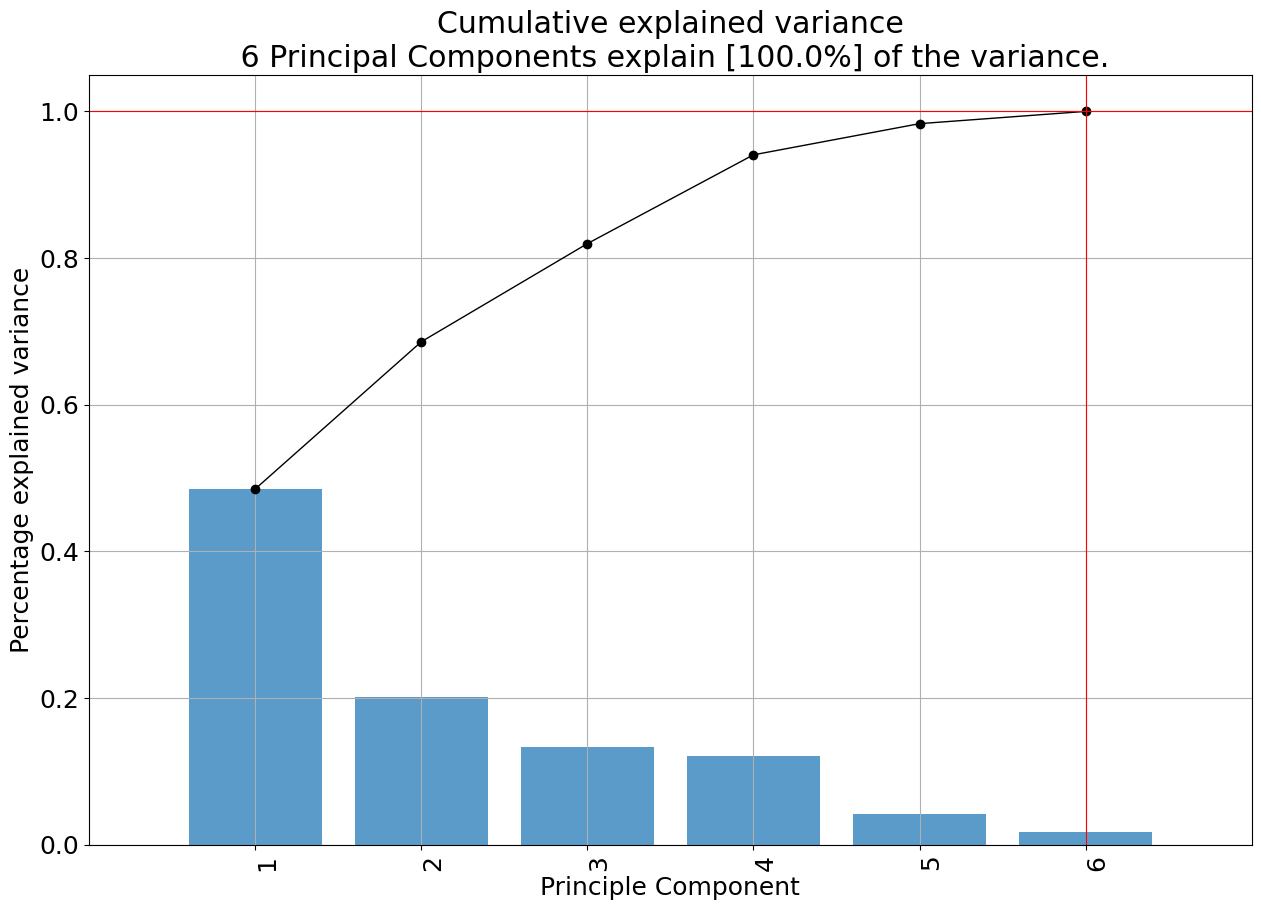

In [4]:
# Plot the variance explained in a scree plot
fig, ax = model.plot()
plt.show()

/tmp/ipykernel_595/3082826753.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette=sns.color_palette("hsv", 10))


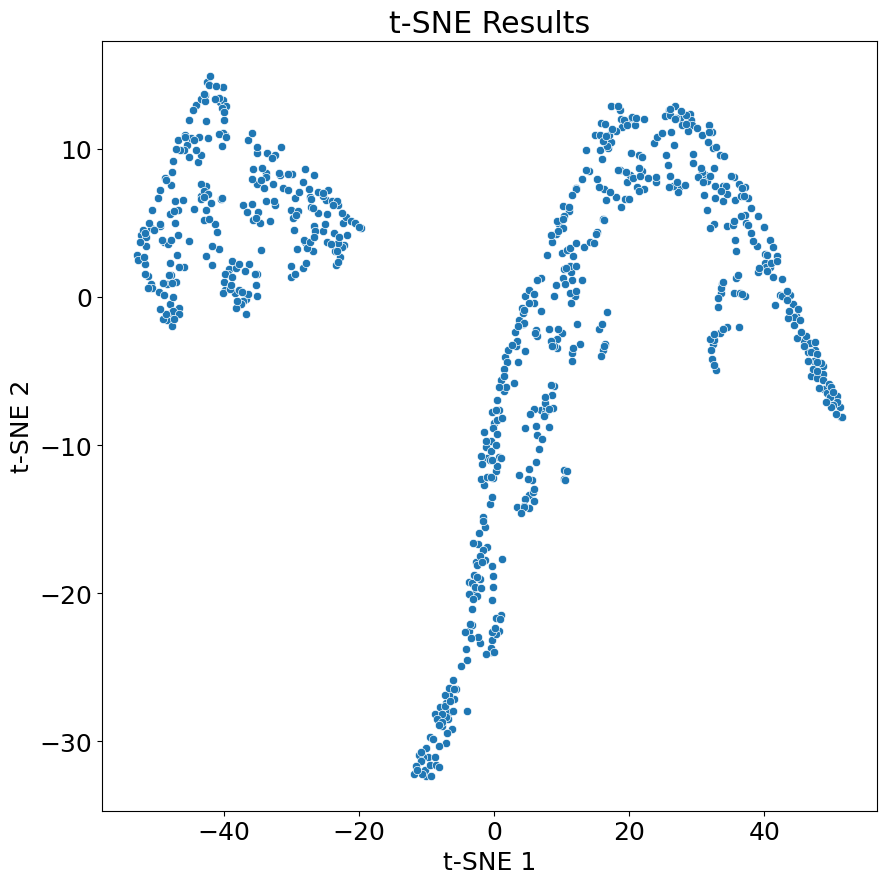

In [6]:
from sklearn.manifold import TSNE

# Perform t-SNE on the data
tsne = TSNE(n_components=2, random_state=SEED)
tsne_results = tsne.fit_transform(base_df_no_industry)

# Visualize the t-SNE results
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette=sns.color_palette("hsv", 10))
plt.title("t-SNE Results")
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()